In [5]:
import math
import numpy as np; from numpy import array, sum, mean
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# Curve Fitting

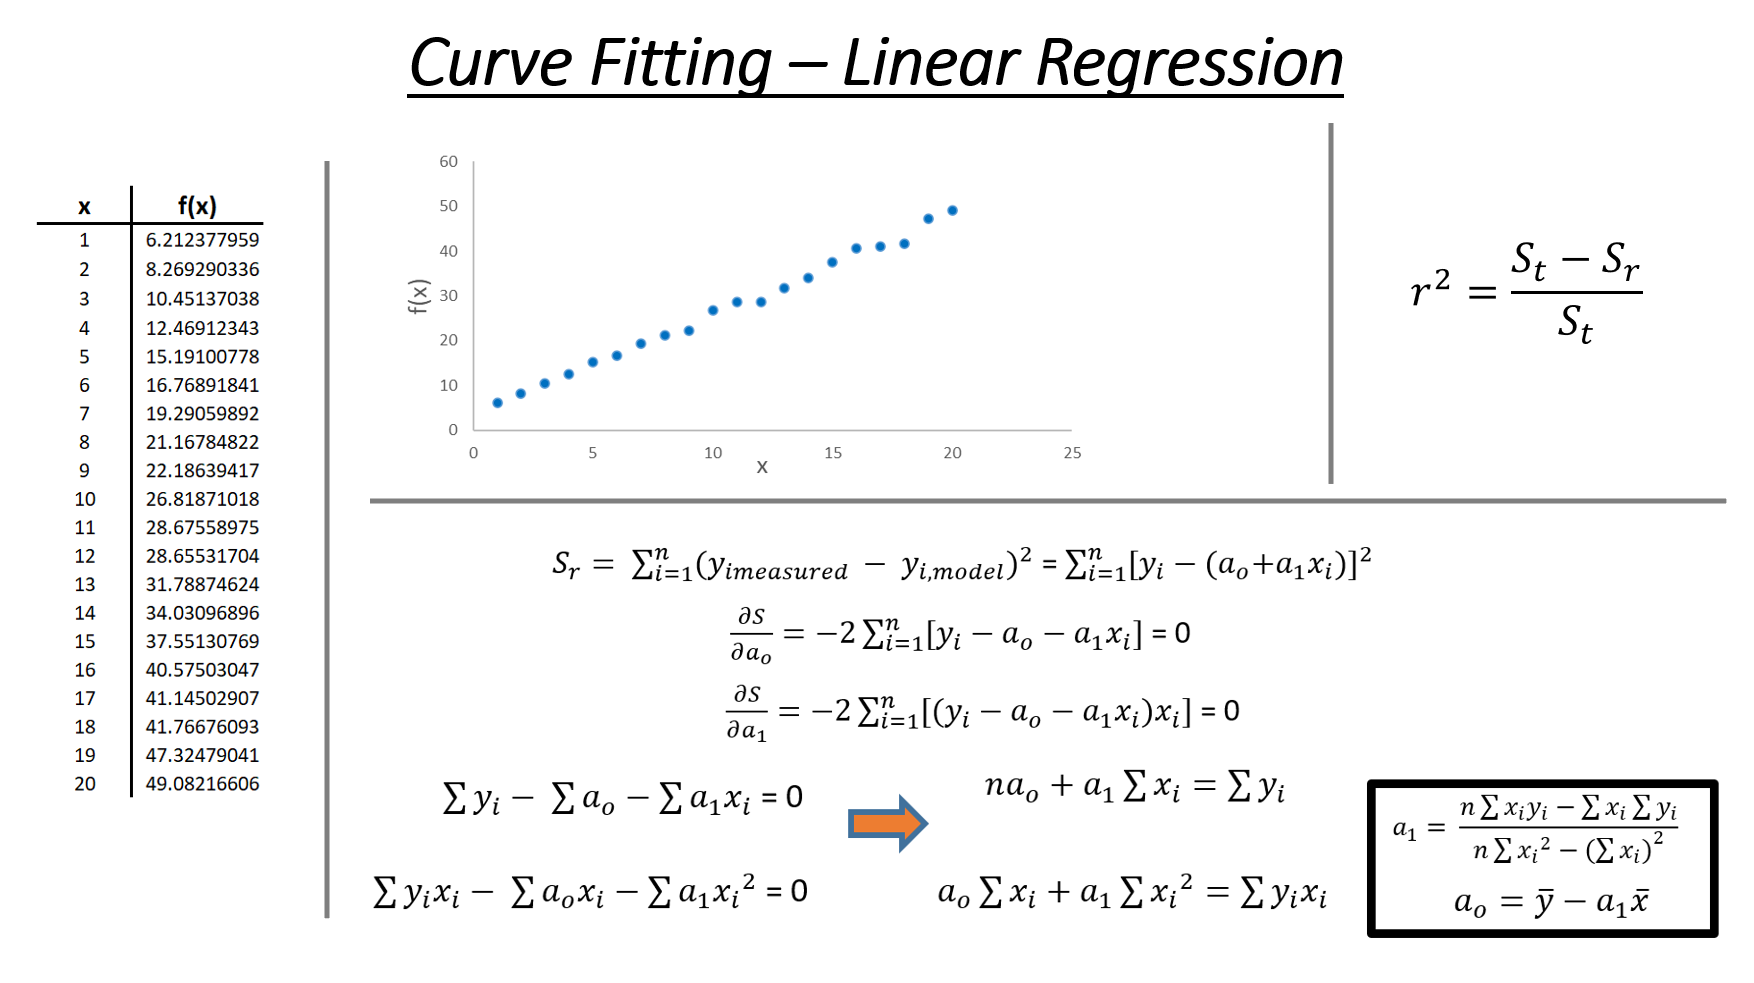

In [2]:
Image(filename="Linear Regression.png")

## Linear Regression (for-Loop)

In [6]:
#Data Points
x = array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],float)
y = array([6.212377959, 8.269290336, 10.45137038, 12.46912343, 15.19100778, 16.76891841, 19.29059892, 21.16784822,22.18639417,26.81871018,28.67558975,28.65531704,31.78874624,34.03096896,37.55130769,40.57503047,41.14502907,41.76676093,47.32479041,49.08216606],float)
n = len(x)

#Calculate Sums
sumx = sumx2 = sumxy = sumy = 0
for i in range(n):
    sumx += x[i]
    sumx2 += x[i]**2
    sumxy += x[i]*y[i]
    sumy += y[i]

#Calculate Slope
a1 = (n*sumxy - sumx*sumy)/(n*sumx2 - (sumx)**2)

#Calculate Intercept
xm = sumx / n
ym = sumy / n
ao = ym - a1*xm
print('The straight line equation')
print('y = %.3f + %.3fx' % (ao,a1))

The straight line equation
y = 3.565 + 2.229x


## Linear Regression (NumPy Functions)

In [7]:
#Data Points
x = array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],float)
y = array([6.212377959, 8.269290336, 10.45137038, 12.46912343, 15.19100778, 16.76891841, 19.29059892, 21.16784822,22.18639417,26.81871018,28.67558975,28.65531704,31.78874624,34.03096896,37.55130769,40.57503047,41.14502907,41.76676093,47.32479041,49.08216606],float)
n = len(x)      

#Intercept & Slope equaitons
a1 = (n*sum(x*y) - sum(x)*sum(y))/(n*sum(x**2) - (sum(x)**2))
ao = mean(y) - a1*mean(x)

print('The straight line equation:')
print('f(x) = %.3f + %.3fx'%(ao,a1))

The straight line equation:
f(x) = 3.565 + 2.229x


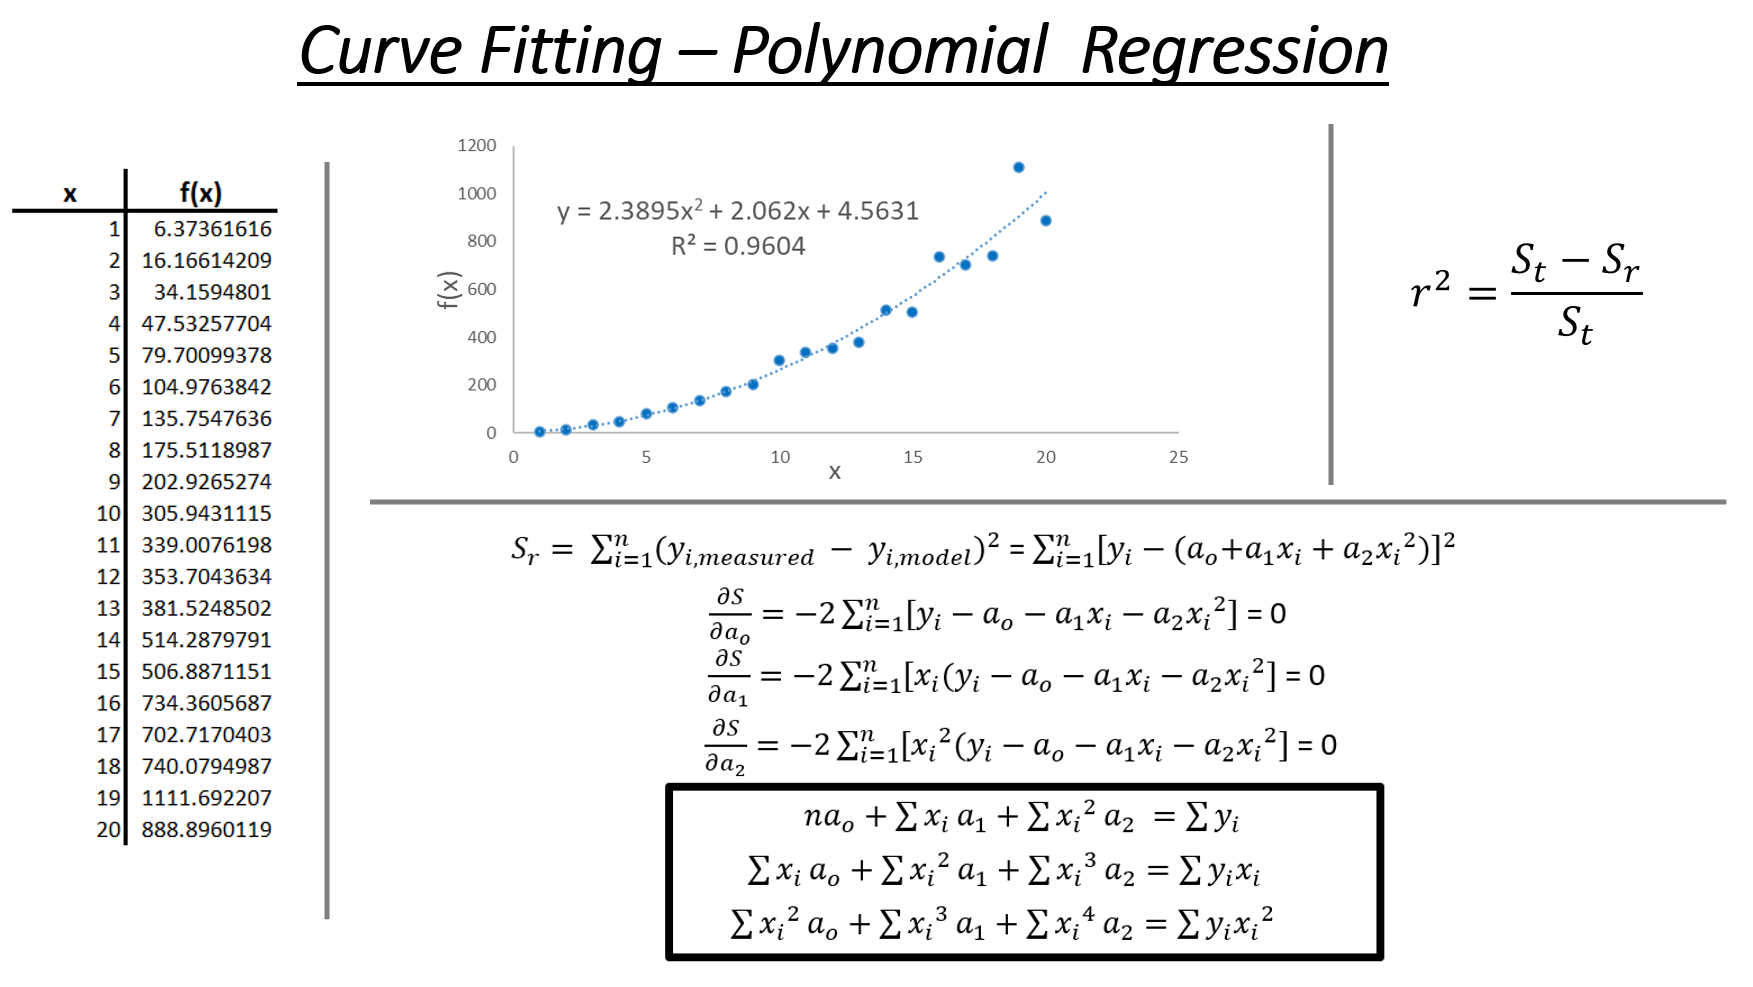

In [8]:
Image(filename="Polynomial Regression.png")

## Polynomial Regression (Using Gauss Elimination)

In [59]:
x = array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],float)
y = array([6.37361616,16.16614209,34.1594801,47.53257704,79.70099378,104.9763842,135.7547636,175.5118987,202.9265274,305.9431115,339.0076198,353.7043634,381.5248502,514.2879791,506.8871151,734.3605687,702.7170403,740.0794987,1111.692207,888.8960119],float)
n = len(x)
o = 2

a = np.zeros((o+1, o+1)); b = np.zeros(o+1); s = np.zeros(o+1)

#Calculate Matrix A & Vector B
for i in range(1, o+2):
    #Create A Matrix Coeff.
    for j in range(1,i+1):
        k = i + j - 2
        Sum = 0
        for L in range(0, n):
            Sum = Sum + x[L] ** k
        a[i-1, j-1] = Sum
        a[j-1, i-1] = Sum

    #Create b vector
    Sum = 0
    for L in range(0, n):
        Sum = Sum + y[L] * x[L] ** (i-1)
    b[i-1] = Sum
    
#Elimination
for k in range(o):  
    for i in range(k+1, o+1):
        fctr = a[i, k] / a[k, k]
        for j in range(k, o+1):
            a[i, j] = a[i, j] - fctr*a[k, j]
        b[i] = b[i] - fctr*b[k]
                       
#Back-substitution
s[o] = b[o] / a[o, o]
for i in range(o-1, -1, -1):
    Sum = b[i]
    for j in range(i+1, o+1):
        Sum = Sum - a[i, j]*s[j]
    s[i] = Sum/a[i, i]

print ('The polynomial :')
print('f(x) = \t %f'%s[0])
for i in range(1, o+1):
    print('\t %+f x^%d' % (s[i],i))

The polynomial :
f(x) = 	 4.563078
	 +2.062039 x^1
	 +2.389517 x^2


## Polynomial Regression (Using NumPy Linear Algebra Solver)

In [9]:
x = array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],float)
y = array([6.37361616,16.16614209,34.1594801,47.53257704,79.70099378,104.9763842,135.7547636,175.5118987,202.9265274,305.9431115,339.0076198,353.7043634,381.5248502,514.2879791,506.8871151,734.3605687,702.7170403,740.0794987,1111.692207,888.8960119],float)
n = len(x)
o = 2

a = np.zeros((o+1, o+1)); b = np.zeros(o+1); s = np.zeros(o+1)

#Calculate Matrix A & Vector B
for i in range(1, o+2):
    #Create A Matrix Coeff.
    for j in range(1,i+1):
        k = i + j - 2
        Sum = 0
        for L in range(0, n):
            Sum = Sum + x[L] ** k
        a[i-1, j-1] = Sum
        a[j-1, i-1] = Sum

    #Create b vector
    Sum = 0
    for L in range(0, n):
        Sum = Sum + y[L] * x[L] ** (i-1)
    b[i-1] = Sum
    
s = np.linalg.solve(a, b)

print ('The polynomial :')
print('f(x) = \t %f'%s[0])
for i in range(1, o+1):
    print('\t %+f x^%d' % (s[i],i))

The polynomial :
f(x) = 	 4.563078
	 +2.062039 x^1
	 +2.389517 x^2


## Cubic Spline

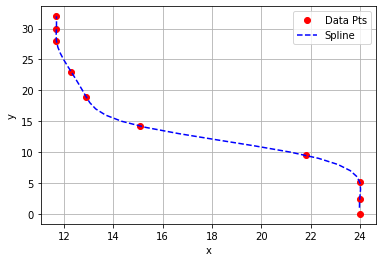

In [37]:
x = array([0,2.4,5.1,9.5,14.2,19,23,28,30,32],float)
y = array([24,24,24,21.8,15.1,12.9,12.3,11.7,11.7,11.7],float)
x_u = array(range(1,33),float)
n = len(x)-1

e = np.zeros(n+1); g = np.zeros(n+1); r = np.zeros(n+1); f = np.zeros(n+1); d2x = np.zeros(n+1); factor = np.zeros(n+1) 
y_u = np.zeros(len(x_u)); d_y = np.zeros(len(x_u)); d_2y = np.zeros(len(x_u))
d2x[0] = 0; d2x[n] = 0

#Create Tridiagonal Matrix
f[0] = 2 * (x[2] - x[0])
g[0] = (x[2] - x[0])
r[0] = (6 / (x[2] - x[1])) * (y[2] - y[1])
r[0] = r[0] + (6 / (x[1] - x[0])) * (y[2] - y[1])

for i in range(2, n):
    e[i-1] = (x[i] - x[i - 1])
    f[i-1] = 2 * (x[i + 1] - x[i - 1])
    g[i-1] = (x[i + 1] - x[i])
    r[i-1] = (6 / (x[i + 1] - x[i])) * (y[i + 1] - y[i])
    r[i-1] = r[i-1] + (6 / (x[i] - x[i - 1])) * (y[i - 1] - y[i])
    
e[n - 2] = (x[n - 1] - x[n - 2])
f[n - 2] = 2 * (x[n] - x[n - 2])
r[n - 2] = (6 / (x[n] - x[n - 1])) * (y[n] - y[n - 1])
r[n - 2] = r[n - 2] + (6 / (x[n - 1] - x[n - 2])) * (y[n - 2] - y[n - 1])

#Thomas Algorithm
#Forward Elimination
for k in range(2, n):
    factor[k-1] = e[k-1] / f[k - 2]
    f[k-1] = f[k-1] - factor[k-1] * g[k - 2]
    r[k-1] = r[k-1] - factor[k-1] * r[k - 2]

#Backward Substitution
d2x[n - 1] = r[n - 2] / f[n - 2]
for k in range(n - 2, 0,-1):
    d2x[k] = (r[k-1] - g[k-1] * d2x[k+1]) / f[k-1]
    
for k in range(len(x_u)):  
    xu = x_u[k]
    flag = 0
    i = 1
    while flag != 1:
        #Identify what interval the pt of interest is
        if xu >= x[i - 1] and xu <= x[i]:
            #Calculating Constants
            c1 = d2x[i - 1] / (6 * (x[i] - x[i - 1]))
            c2 = d2x[i] / (6 * (x[i] - x[i - 1]))
            c3 = y[i - 1] / (x[i] - x[i - 1]) - d2x[i - 1] * (x[i] - x[i - 1]) / 6
            c4 = y[i] / (x[i] - x[i - 1]) - d2x[i] * (x[i] - x[i - 1]) / 6

            #Function Value at xu
            t1 = c1 * (x[i] - xu) ** 3
            t2 = c2 * (xu - x[i - 1]) ** 3
            t3 = c3 * (x[i] - xu)
            t4 = c4 * (xu - x[i - 1])
            yu = t1 + t2 + t3 + t4

            #1st Derivative at xu
            t1 = -3 * c1 * (x[i] - xu) ** 2
            t2 = 3 * c2 * (xu - x[i - 1]) ** 2
            t3 = -c3
            t4 = c4
            dy = t1 + t2 + t3 + t4

            #2nd Derivative at xu
            t1 = 6 * c1 * (x[i] - xu)
            t2 = 6 * c2 * (xu - x[i - 1])
            d2y = t1 + t2
            flag = 1
        else:
            i = i + 1 
        y_u[k] = yu 
        d_y[k] = dy
        d_2y[k] = d2y
        
plt.plot(y,x,'ro', y_u,x_u,'b--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data Pts','Spline'])
plt.grid()       